In [60]:
#pip install tueplots

In [61]:
#from tueplots import bundles, axes
#plt.rcParams.update({"figure.dpi": 150})

In [62]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from utils.data_generator import DataGenerator
from utils.myutils import Utils
import matplotlib.pyplot as plt
import random
import json
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
sns.set_theme(rc={'figure.dpi': 150, 'figure.figsize': (6, 3.75)})
utils = Utils()
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
df = pd.read_json(
    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_contaminated.json"
)
df.head(5)

,IForest,KNN,CBLOF,PCA,ECOD,GPLVM
0,0.496581,0.557006,0.523200,0.530072,0.512396,0.528844
1,0.826387,0.791137,0.700228,0.692759,0.803716,0.646609
2,0.737342,0.794484,0.812179,0.765127,0.830822,0.829236
3,0.979938,0.950617,0.952787,0.955392,0.987365,0.958767
4,0.696507,0.730743,0.722589,0.724840,0.745071,0.717480


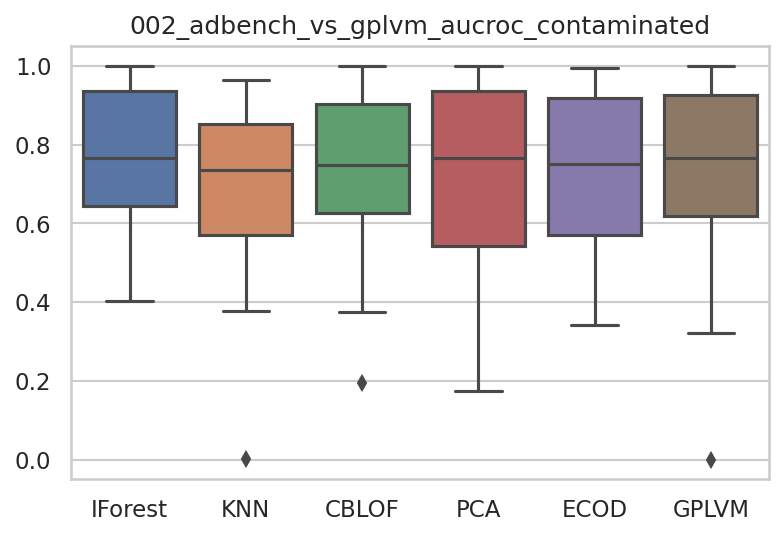

In [65]:
sns.set_style("whitegrid")
s = sns.boxplot(data=df)
s.set_title("002_adbench_vs_gplvm_aucroc_contaminated")
None
#plt.savefig(
#    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_normal.jpg"
#)

In [9]:
base = "experiments/complete/adbench/duplicate_anomalies/"
def save_experiment_boxplot(base_path):
    for path in os.listdir(base_path):
        if path.endswith("json"):
            plt.figure()
            df = pd.read_json(base + path)
            s = sns.boxplot(data=df)
            img = path.replace(".json", ".png")
            title = path.replace(".json", "")
            s.set_title(title)
            plt.savefig(base + "images/" + img)
# save_experiment_boxplot(base)

# Anomalias Duplicadas

In [10]:
base = "experiments/complete/adbench/duplicate_anomalies/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

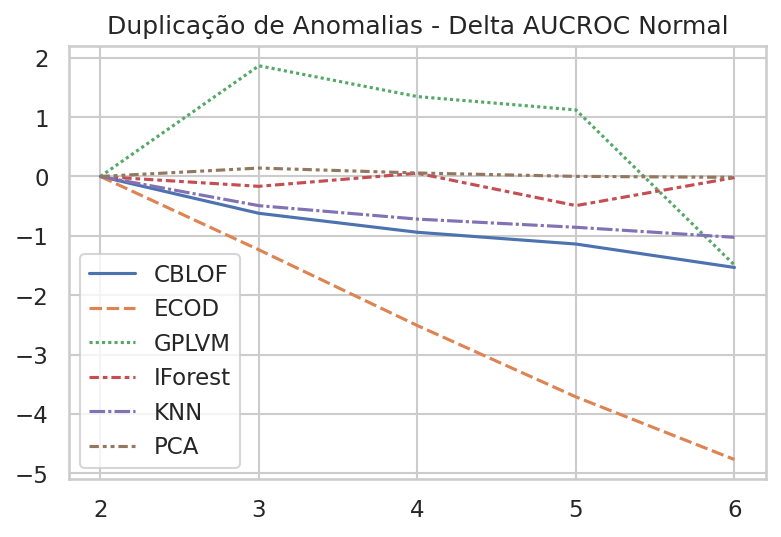

In [11]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_2",
            "aucroc_normal_3",
            "aucroc_normal_4",
            "aucroc_normal_5",
            "aucroc_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_2": "2",
        "aucroc_normal_3": "3",
        "aucroc_normal_4": "4",
        "aucroc_normal_5": "5",
        "aucroc_normal_6": "6",
    }
)
df_normal_aucroc_delta = df_normal_aucroc.subtract(df_normal_aucroc.iloc[0,:])*100
s = sns.lineplot(df_normal_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Normal")
None

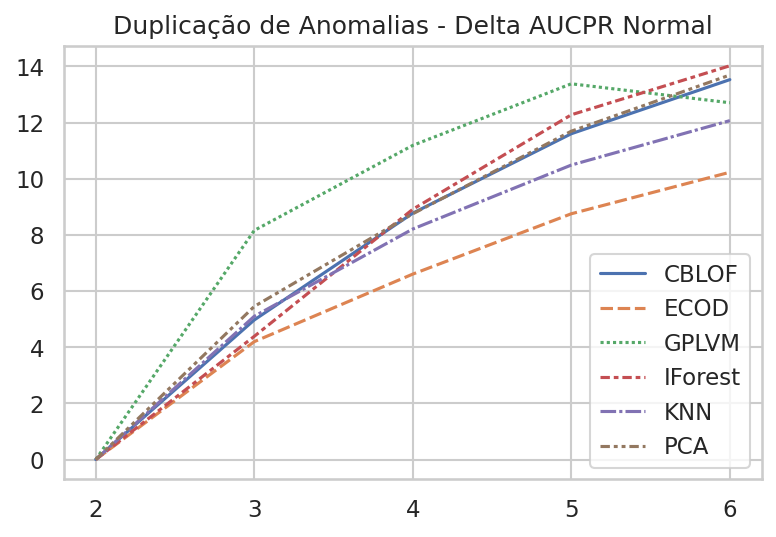

In [12]:
df_normal_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_normal_2",
            "aucpr_normal_3",
            "aucpr_normal_4",
            "aucpr_normal_5",
            "aucpr_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_normal_2": "2",
        "aucpr_normal_3": "3",
        "aucpr_normal_4": "4",
        "aucpr_normal_5": "5",
        "aucpr_normal_6": "6",
    }
)
df_normal_aucpr_delta = df_normal_aucpr.subtract(df_normal_aucpr.iloc[0,:])*100
s = sns.lineplot(df_normal_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Normal")
None

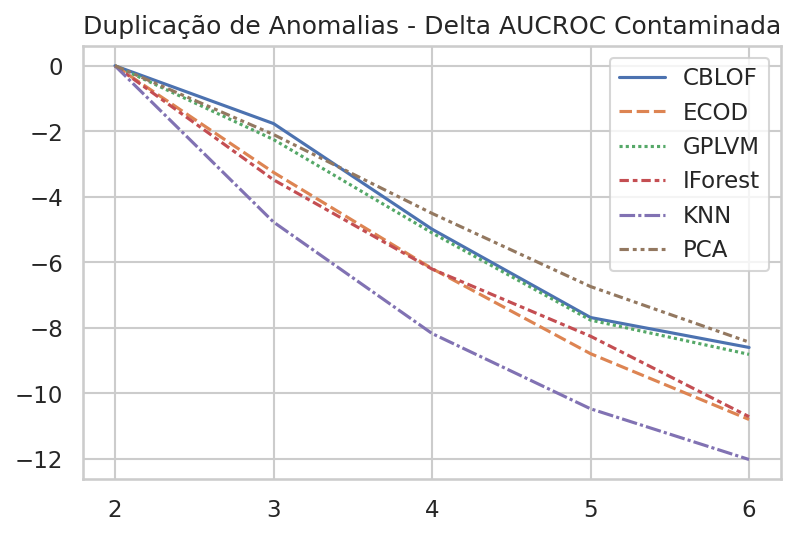

In [13]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_2",
            "aucroc_contaminated_3",
            "aucroc_contaminated_4",
            "aucroc_contaminated_5",
            "aucroc_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_2": "2",
        "aucroc_contaminated_3": "3",
        "aucroc_contaminated_4": "4",
        "aucroc_contaminated_5": "5",
        "aucroc_contaminated_6": "6",
    }
)
df_contaminated_aucroc_delta = df_contaminated_aucroc.subtract(df_contaminated_aucroc.iloc[0,:])*100
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Contaminada")
None

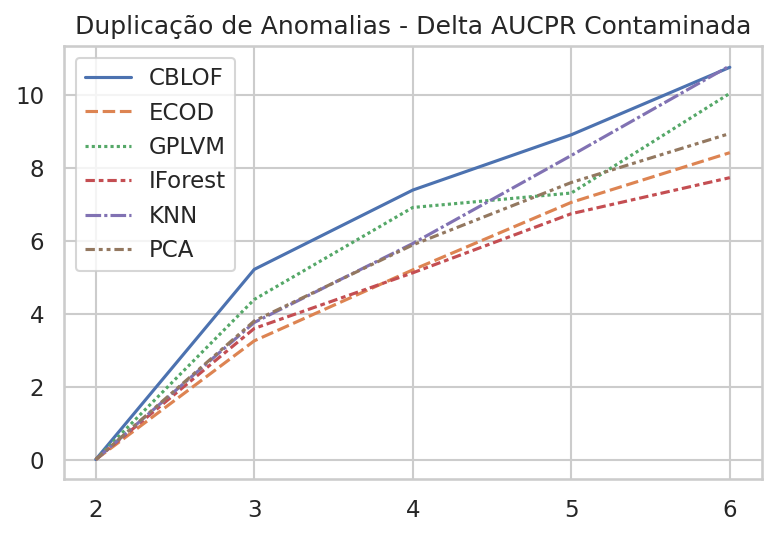

In [14]:
df_contaminated_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_contaminated_2",
            "aucpr_contaminated_3",
            "aucpr_contaminated_4",
            "aucpr_contaminated_5",
            "aucpr_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_contaminated_2": "2",
        "aucpr_contaminated_3": "3",
        "aucpr_contaminated_4": "4",
        "aucpr_contaminated_5": "5",
        "aucpr_contaminated_6": "6",
    }
)
df_contaminated_aucpr_delta = df_contaminated_aucpr.subtract(df_contaminated_aucpr.iloc[0,:])*100
s = sns.lineplot(df_contaminated_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Contaminada")
None

# Features Irrelevantes

In [15]:
base = "experiments/complete/adbench/irrelevant_features/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

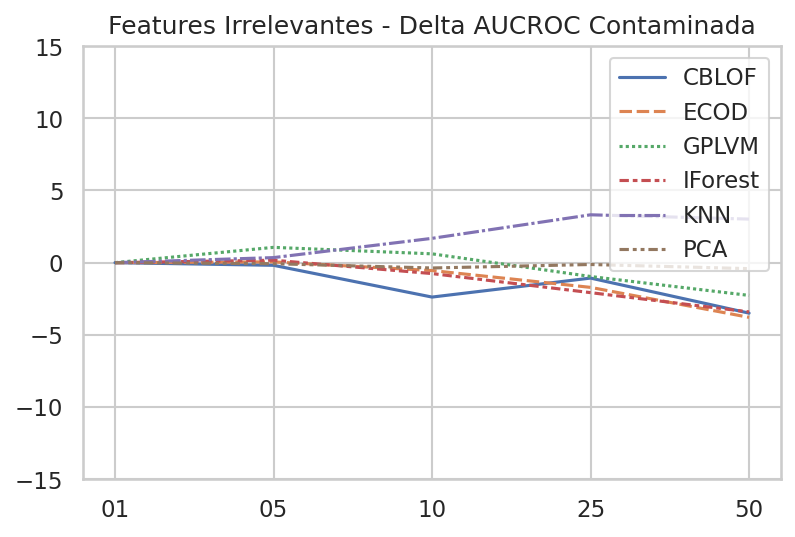

In [16]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_1",
            "aucroc_contaminated_5",
            "aucroc_contaminated_10",
            "aucroc_contaminated_25",
            "aucroc_contaminated_50",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_1": "01",
        "aucroc_contaminated_5": "05",
        "aucroc_contaminated_10": "10",
        "aucroc_contaminated_25": "25",
        "aucroc_contaminated_50": "50",
    }
)
df_contaminated_aucroc_delta = df_contaminated_aucroc.sort_index().subtract(df_contaminated_aucroc.iloc[0,:])*100
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_ylim([-15,15])
s.set_title("Features Irrelevantes - Delta AUCROC Contaminada")
None

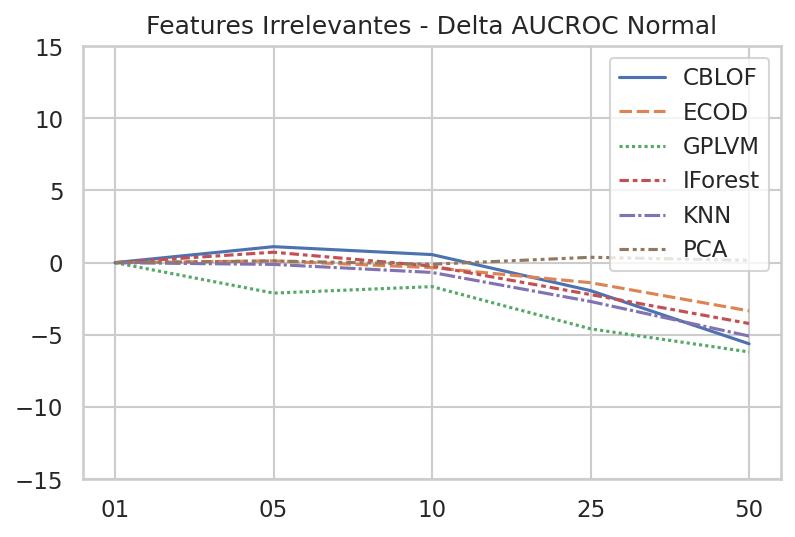

In [17]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_1",
            "aucroc_normal_5",
            "aucroc_normal_10",
            "aucroc_normal_25",
            "aucroc_normal_50",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_1": "01",
        "aucroc_normal_5": "05",
        "aucroc_normal_10": "10",
        "aucroc_normal_25": "25",
        "aucroc_normal_50": "50",
    }
)
df_normal_aucroc_delta = df_normal_aucroc.sort_index().subtract(df_normal_aucroc.iloc[0,:])*100
s = sns.lineplot(df_normal_aucroc_delta)
s.set_ylim([-15,15])
s.set_title("Features Irrelevantes - Delta AUCROC Normal")
None

# Epoch 5000

In [52]:
df_5000 = pd.read_json("experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_5000.json").rename(columns = { "GPLVM": "GPLVM_5000"  } )
df_1000 = pd.read_json("experiments/complete/gplvm/001_gplvm_contaminated.json")[["test_auc_roc"]].rename(columns = { "test_auc_roc": "GPLVM_1000"  } )

<Axes: >

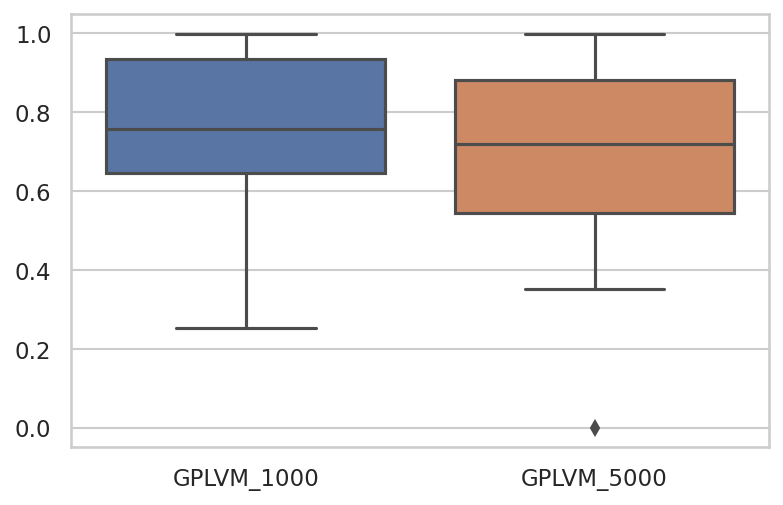

In [54]:
sns.boxplot(pd.concat([df_1000,df_5000], axis = 1))

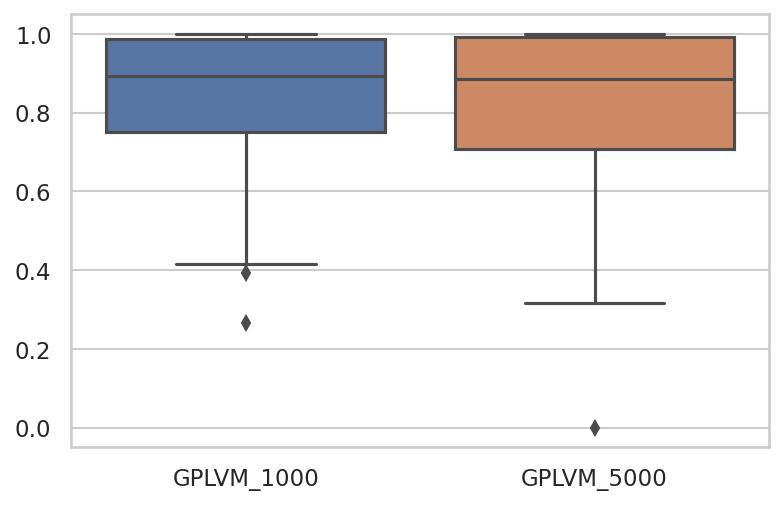

In [56]:
df_5000 = pd.read_json("experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_5000.json").rename(columns = { "GPLVM": "GPLVM_5000"  } )
df_1000 = pd.read_json("experiments/complete/gplvm/000_gplvm_normal_03_best.json")[["test_auc_roc"]].rename(columns = { "test_auc_roc": "GPLVM_1000"  } )
sns.boxplot(pd.concat([df_1000,df_5000], axis = 1))
None